In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [2]:
file = ['2008.csv','2009.csv','2010.csv', '2011.csv', '2012.csv', '2013.csv', '2014.csv', '2015.csv', '2016.csv', '2017.csv']

In [3]:
temp = [pd.read_csv(f) for f in file]

In [4]:
data = pd.concat(temp, ignore_index=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181482 entries, 0 to 1181481
Data columns (total 11 columns):
date                        1181482 non-null object
trading_code                1181482 non-null object
last_traded_price           1181482 non-null float64
high                        1181482 non-null float64
low                         1181482 non-null float64
opening_price               1181482 non-null float64
closing_price               1181482 non-null float64
yesterdays_closing_price    1181482 non-null float64
trade                       1181482 non-null int64
value_mn                    1181482 non-null float64
volume                      1181482 non-null int64
dtypes: float64(7), int64(2), object(2)
memory usage: 99.2+ MB


In [6]:
data.head()

,date,trading_code,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume
0,2008-12-30 00:00:00,1STBSRS,823.00,840.00,819.0,825.0,826.25,825.75,86,4.1475,5000
1,2008-12-28 00:00:00,1STBSRS,817.00,829.00,802.0,802.0,825.75,790.00,59,2.7838,3400
2,2008-12-24 00:00:00,1STBSRS,789.00,809.75,786.0,790.0,790.00,785.75,74,3.5270,4450
3,2008-12-23 00:00:00,1STBSRS,785.00,798.50,785.0,785.0,785.75,782.50,38,2.0541,2600
4,2008-12-22 00:00:00,1STBSRS,778.25,794.50,775.5,787.0,782.50,797.75,19,0.7825,1000


In [7]:
data.isna().sum()

date                        0
trading_code                0
last_traded_price           0
high                        0
low                         0
opening_price               0
closing_price               0
yesterdays_closing_price    0
trade                       0
value_mn                    0
volume                      0
dtype: int64

In [8]:
print(type(data['date'][0]))

<class 'str'>


In [9]:
data['date'].shape

(1181482,)

In [10]:
data['date'].isna().sum()

0

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181482 entries, 0 to 1181481
Data columns (total 11 columns):
date                        1181482 non-null object
trading_code                1181482 non-null object
last_traded_price           1181482 non-null float64
high                        1181482 non-null float64
low                         1181482 non-null float64
opening_price               1181482 non-null float64
closing_price               1181482 non-null float64
yesterdays_closing_price    1181482 non-null float64
trade                       1181482 non-null int64
value_mn                    1181482 non-null float64
volume                      1181482 non-null int64
dtypes: float64(7), int64(2), object(2)
memory usage: 99.2+ MB


In [12]:
data = data[(data['last_traded_price']>0)]
data = data[(data['high']>0)]
data = data[(data['low']>0)]
data = data[(data['opening_price']>0)]
data = data[(data['closing_price']>0)]
data = data[(data['yesterdays_closing_price']>0)]
data = data[(data['trade']>0)]
data = data[(data['value_mn']>0)]
data = data[(data['volume']>0)]

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 657455 entries, 0 to 1181481
Data columns (total 11 columns):
date                        657455 non-null object
trading_code                657455 non-null object
last_traded_price           657455 non-null float64
high                        657455 non-null float64
low                         657455 non-null float64
opening_price               657455 non-null float64
closing_price               657455 non-null float64
yesterdays_closing_price    657455 non-null float64
trade                       657455 non-null int64
value_mn                    657455 non-null float64
volume                      657455 non-null int64
dtypes: float64(7), int64(2), object(2)
memory usage: 60.2+ MB


In [14]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

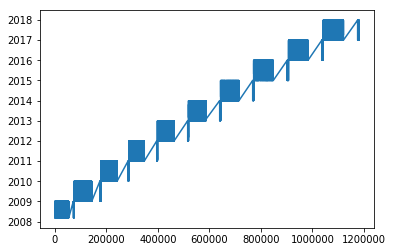

In [15]:
plt.plot(data['date'])

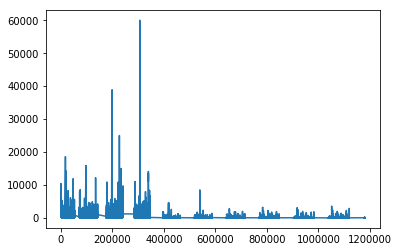

In [16]:
plt.plot(data['high'])

In [17]:
new_data = data

In [18]:
new_data.reset_index(inplace=True)

In [19]:
data.reset_index(level=0, inplace=True)

In [20]:
data = data.drop("index", axis=1)

In [21]:
data.rename(columns={'level_0':'index'},inplace=True)

In [22]:
data.set_index('index', inplace=True)

In [23]:
data.head()

,date,trading_code,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume
index,,,,,,,,,,,
0,2008-12-30,1STBSRS,823.00,840.00,819.0,825.0,826.25,825.75,86,4.1475,5000
1,2008-12-28,1STBSRS,817.00,829.00,802.0,802.0,825.75,790.00,59,2.7838,3400
2,2008-12-24,1STBSRS,789.00,809.75,786.0,790.0,790.00,785.75,74,3.5270,4450
3,2008-12-23,1STBSRS,785.00,798.50,785.0,785.0,785.75,782.50,38,2.0541,2600
4,2008-12-22,1STBSRS,778.25,794.50,775.5,787.0,782.50,797.75,19,0.7825,1000


In [24]:
le = LabelEncoder()

In [25]:
X = data.iloc[:,1]

In [26]:
X.nunique()

432

In [27]:
X_2 = le.fit_transform(X)

In [28]:
X_3 = pd.DataFrame({'trading_code':X_2})

In [29]:
X_3.shape

(657455, 1)

In [30]:
data['trading_code'] = X_3.iloc[:,0]

In [31]:
data.head()

,date,trading_code,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume
index,,,,,,,,,,,
0,2008-12-30,1,823.00,840.00,819.0,825.0,826.25,825.75,86,4.1475,5000
1,2008-12-28,1,817.00,829.00,802.0,802.0,825.75,790.00,59,2.7838,3400
2,2008-12-24,1,789.00,809.75,786.0,790.0,790.00,785.75,74,3.5270,4450
3,2008-12-23,1,785.00,798.50,785.0,785.0,785.75,782.50,38,2.0541,2600
4,2008-12-22,1,778.25,794.50,775.5,787.0,782.50,797.75,19,0.7825,1000


In [32]:
data.tail()

,date,trading_code,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume
index,,,,,,,,,,,
657450,2017-01-05,431,36.6,37.2,34.9,34.9,36.3,36.0,128,0.857,23581
657451,2017-01-04,431,36.0,40.5,36.0,40.5,36.0,39.9,90,0.928,25097
657452,2017-01-03,431,40.7,40.7,37.7,39.0,39.9,37.0,107,1.279,32230
657453,2017-01-02,431,37.0,42.8,37.0,41.0,37.0,41.1,145,1.203,31671
657454,2017-01-01,431,40.2,46.1,40.2,46.1,41.1,44.6,165,2.504,57926


In [33]:
enc = OneHotEncoder()

In [34]:
x_4 = data['trading_code']

In [35]:
dfDummies = pd.get_dummies(x_4, prefix = 'trading_code')

In [36]:
dfDummies.head()

,trading_code_0,trading_code_1,trading_code_2,trading_code_3,trading_code_4,trading_code_5,trading_code_6,trading_code_7,trading_code_8,trading_code_9,...,trading_code_422,trading_code_423,trading_code_424,trading_code_425,trading_code_426,trading_code_427,trading_code_428,trading_code_429,trading_code_430,trading_code_431
index,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 657455 entries, 0 to 657454
Data columns (total 11 columns):
date                        657455 non-null datetime64[ns]
trading_code                657455 non-null int32
last_traded_price           657455 non-null float64
high                        657455 non-null float64
low                         657455 non-null float64
opening_price               657455 non-null float64
closing_price               657455 non-null float64
yesterdays_closing_price    657455 non-null float64
trade                       657455 non-null int64
value_mn                    657455 non-null float64
volume                      657455 non-null int64
dtypes: datetime64[ns](1), float64(7), int32(1), int64(2)
memory usage: 57.7 MB


In [38]:
data.sort_values('date', inplace=True)
data.set_index('date', inplace=True)

In [39]:
x = data[['last_traded_price', 'high', 'low','opening_price','closing_price','yesterdays_closing_price', 'trade', 'value_mn','volume']]

In [40]:
x.head()

,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume
date,,,,,,,,,
2008-03-06,31.7,31.7,30.0,30.00,31.4,29.70,430,11.9753,384500
2008-03-06,464.0,465.0,447.5,450.75,463.0,449.50,1212,68.0060,148900
2008-03-06,17.1,17.6,17.0,17.00,17.3,16.90,58,0.7508,43000
2008-03-06,111.3,115.0,110.0,111.00,112.2,111.80,345,5.1661,45950
2008-03-06,4700.0,4700.0,4575.0,4650.00,4656.5,4695.75,794,49.5208,10690


In [41]:
y = data[['closing_price']]

In [42]:
shift_steps = 1
df_shifted = data.shift(-shift_steps)
df_shifted.head()

,trading_code,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume
date,,,,,,,,,,
2008-03-06,275.0,464.0,465.0,447.5,450.75,463.0,449.50,1212.0,68.0060,148900.0
2008-03-06,76.0,17.1,17.6,17.0,17.00,17.3,16.90,58.0,0.7508,43000.0
2008-03-06,173.0,111.3,115.0,110.0,111.00,112.2,111.80,345.0,5.1661,45950.0
2008-03-06,412.0,4700.0,4700.0,4575.0,4650.00,4656.5,4695.75,794.0,49.5208,10690.0
2008-03-06,160.0,14.0,14.3,13.3,13.30,13.8,13.20,280.0,3.8612,278500.0


In [43]:
data_train = data.values[0:-shift_steps]
data_target = y.values[0:-shift_steps]

In [44]:
print(type(data_target))
print(type(data_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [45]:
data_train.shape, data_target.shape

((657454, 10), (657454, 1))

In [46]:
num_data = len(data_train)

In [47]:
train_split = 0.9
num_train = int(train_split * num_data)
num_test = num_data - num_train

In [48]:
X_train_orig = data_train[0:num_train]
X_test_orig = data_train[num_train:]

y_train_orig = data_target[0:num_train]
y_test_orig = data_target[num_train:]

In [49]:
X_train_orig.shape, y_train_orig.shape, X_test_orig.shape, y_test_orig.shape

((591708, 10), (591708, 1), (65746, 10), (65746, 1))

In [50]:
x_scaler = MinMaxScaler(feature_range=(0, 1))
X_train = x_scaler.fit_transform(X_train_orig)
X_test = x_scaler.transform(X_test_orig)

In [51]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train_orig, y_train_orig)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [52]:
predictions = rf.predict(X_test_orig)
# Calculate the absolute errors
errors = abs(predictions - y_test_orig)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
Mean Absolute Error: 3.83 degrees.

SyntaxError: invalid syntax (<ipython-input-52-df55e90238c4>, line 6)